<a href="https://colab.research.google.com/github/nnh92/Kmeans-Clustering/blob/Trial/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.57221825 0.08158127]
[2.45191552 2.61981621]
[-2.08780815  4.69237446]
[-1.26508352  1.4421649 ]
[ 1.58325575 -0.02909337]
[2.52893435 2.50996606]
[-2.15105149  4.31051161]
[-1.00198451  1.31670349]
[ 1.59529759 -0.01329825]
[2.60484181 2.43689409]
[-2.01238487  4.03995155]
[-0.91210632  1.05163273]
[ 1.59529759 -0.01329825]
[2.67155082 2.37472608]
[-1.68314486  3.71541923]
[-0.79085112  0.8783885 ]
[ 1.65782979 -0.02698754]
[2.67155082 2.37472608]
[-1.53856207  3.615696  ]
[-0.69943041  0.7127072 ]
[ 1.74994869 -0.06684884]
[2.74429546 2.34665196]
[-1.29368081  3.45517119]
[-0.52204471  0.60658671]
[ 1.82653922 -0.05535233]
[2.74429546 2.34665196]
[-1.28532083  3.34304096]
[-0.41379683  0.45771109]
[ 1.88403194 -0.10896437]
[2.74429546 2.34665196]
[-1.28532083  3.34304096]
[-0.31094571  0.49314003]
[ 2.04437332 -0.29342711]
[2.67785746 2.28192042]
[-1.28532083  3.34304096]
[-0.15133636  0.49444171]
[ 2.22904652 -0.43757632]
[2.57249194 2.31751921]
[-1.28532083  3.34304096]
[-0.0622

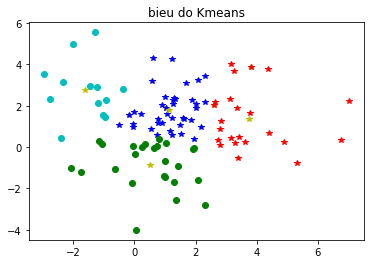

-1
0
1
2
3
4
5
6


In [8]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
N = 100
A = np.random.multivariate_normal([1,1],[[3,0],[0,3]],N)

original_label = np.asarray([0]*len(A[:,0]))
X = A
K = 4

original_label_K = np.asarray([5]*K)
#print(original_label)

def kmeans_display(X, label):
  X0 = X[label == 0,:]
  X1 = X[label == 1,:]
  X2 = X[label == 2,:]
  X3 = X[label == 3,:]
  X4 = X[label == 4,:]
  X5 = X[label == 5,:]
  X6 = X[label == 6,:]
  plt.plot(X0[:,0],X0[:,1],'b*',markersize = 6)
  plt.plot(X1[:,0],X1[:,1],'go',markersize = 6)
  plt.plot(X2[:,0],X2[:,1],'r*',markersize = 6)
  plt.plot(X3[:,0],X3[:,1],'co',markersize = 6)
  plt.plot(X4[:,0],X4[:,1],'mo',markersize = 6)
  plt.plot(X5[:,0],X5[:,1],'y*',markersize = 6)
  plt.plot(X6[:,0],X6[:,1],'k^',markersize = 6)

  plt.title('bieu do Kmeans')
  #plt.show()

#kmeans_display(X,original_label)

def kmeans_int_centers(X,k):
  #print(X[np.random.choice(X.shape[0],k, replace=False)])
  return X[np.random.choice(X.shape[0],k,replace = False)]

#print(X.shape[0])
TR = kmeans_int_centers(X,K)
#print(type(TR))
kmeans_display(TR,original_label_K)

def kmeans_assign_centers(X, centers):
  D = cdist(X, centers)
  #print(D)
  return np.argmin(D, axis = 1)

#print(kmeans_assign_centers(X, TR))
#print(len(kmeans_assign_centers(X,TR)))
#print(X)

def kmeans_update_centers(X, label, K):
  centers = np.zeros((K,X.shape[1]))
  #print(centers)
  for k in range(K):
    Xk = X[label==k,:]
    centers[k,:] = np.mean(Xk, axis = 0)
    print(np.mean(Xk, axis = 0))
    #print(k)
  return centers

def kmeans_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(b) for b in new_centers]))

#print(np.zeros(X.shape[0]))
def kmeans(X, K):
  centers = [kmeans_int_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_centers(X,centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if kmeans_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)

kmeans(X, K)
(centers, labels, it) = kmeans(X, K)

kmeans_display(X,labels[-1])
#print(centers[-1],it)
kmeans_display(centers[-1], original_label_K)
plt.show()

for i in range(it+1):
  #kmeans_display(centers[i],original_label_K)
  i-=1
  print(i)
  plt.show()
